# Twitter Sentiment Analysis

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import os

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gympohnpimol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
os.chdir(r'/Users/gympohnpimol/Desktop/Hackathons_ML/Sentiment Analysis')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


### Data Wranging
Text Cleaning and remove html tags numbers with special Characters

In [13]:
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
token = WordPunctTokenizer()
lemma = WordNetLemmatizer()

In [22]:
re_1 = r'@[A-Za-z0-9_]+'
re_2 = r'http?://[^ ]+'
combine_regex = r'|'.join((re_1, re_2))
negatives = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am', 'b4': 'before',
            'idc': "i do not care", 'ty': 'thankyou', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love', 'xoxo': 'love',
            'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good', 'h8': 'hate',
            'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
             'irl': 'in real life', 'yolo': 'you only live once'}
neg_regex = re.compile(r'\b(' + '|'.join(negatives.keys()) + r')\b')
sht_regex = re.compile(r'\b(' + '|'.join(shortcuts.keys()) + r')\b')

In [27]:
from bs4 import BeautifulSoup
def tweet_clean(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        removed = souped.decode('utf-8-sig').replace(u'\ufffd', '?')
    except:
        removed = souped
    strip = re.sub(combine_regex,' ', removed)
    lower = strip.lower()
    neg_word = neg_regex.sub(lambda x: negatives[x.group()], lower)
    short_word = sht_regex.sub(lambda x: shortcuts[x.group()], neg_word)
    letter = re.sub('[^a-zA-Z]', ' ', short_word)
    words = [x for x in token.tokenize(letter) if len(x) > 1]
    lemma_word = [lemma.lemmatize(word) for word in words]
    return (' '.join(lemma_word)).strip()

In [28]:
train['clean_tweet'] = train['tweet'].apply(lambda x: tweet_clean(x))
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test http goo gl mfqv an...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks to my ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,am wired know am george wa made that way iphon...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...
5,6,1,iPhone software update fucked up my phone big ...,iphone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,happy for u instapic instadaily u sony xperia ...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,new type charger cable uk bay amazon etsy new ...
8,9,0,Bout to go shopping again listening to music #...,bout to go shopping again listening to music i...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,photo fun selfie pool water sony camera picoft...


In [29]:
test['clean_tweet'] = test['tweet'].apply(lambda x: tweet_clean(x))
test.head(10)

,id,tweet,clean_tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate the new iphone upgrade will not let me do...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting my fucking pant apple imac ...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like to put some cd rom on my ipad is that pos...
3,7924,My ipod is officially dead. I lost all my pict...,my ipod is officially dead lost all my picture...
4,7925,Been fighting iTunes all night! I only want th...,been fighting itunes all night only want the m...
5,7926,#Repost @getbakednfried with repostapp ・・・ to ...,repost with repostapp to announce we will have...
6,7927,This new apple software update is really doing...,this new apple software update is really doing...
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appl...,baby iphone iphone gold new apple appleisbest ...
8,7929,I'm confused...why did I have to take the time...,am confused why did have to take the time to s...
9,7930,Fruit just tastes better when you pick it your...,fruit just taste better when you pick it yours...


## EDA (Exploratory Data Analysis)
The process of counting the number of occurrences of each word that appears in tweet

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

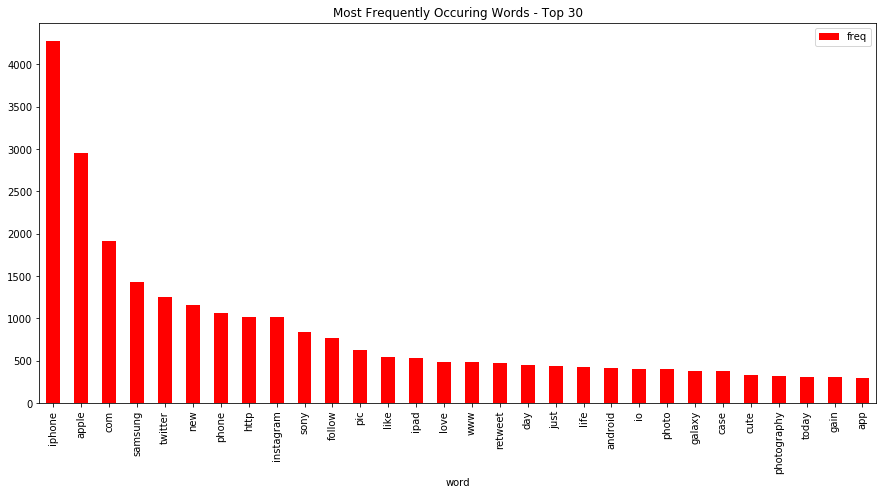

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
word_count = cv.fit_transform(train['clean_tweet'])
sum_word = word_count.sum(axis = 0)
word_freq = [(word, sum_word[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(word_freq,  columns = ['word', 'freq'])
frequency.head(30).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15, 7), color = 'red')
plt.title('Most Frequently Occuring Words - Top 30')

### generating word cloud for the most common occuring words in the train data

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

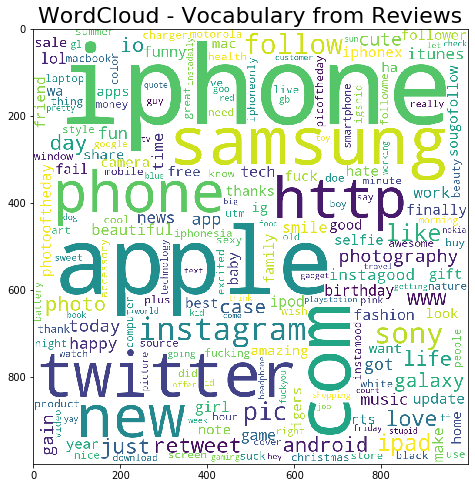

In [44]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Vocabulary from Reviews', fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Normal Vocabulary from Reviews')

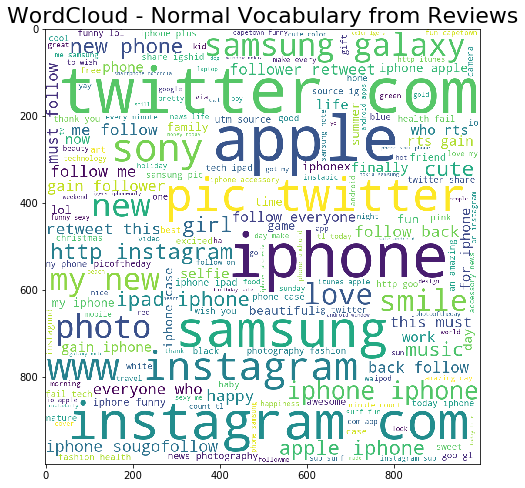

In [46]:
normal_word = ' '.join([text for text in train['clean_tweet'][train['label'] == 0]])
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(normal_word)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Normal Vocabulary from Reviews', fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Negative Vocabulary from Reviews')

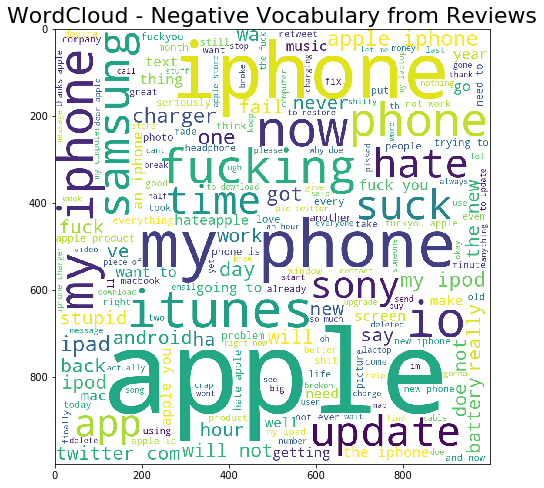

In [48]:
neg_word = ' '.join([text for text in train['clean_tweet'][train['label'] == 1]])
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(neg_word)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud - Negative Vocabulary from Reviews', fontsize = 22)

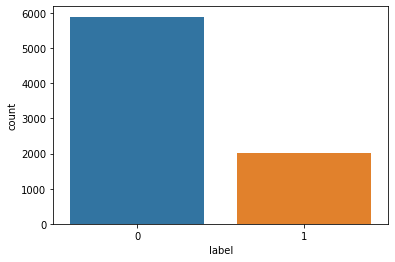

In [45]:
sns.countplot(train['label'])